In [3]:
#PROGRAM METODE BEDA HINGGA EKSPLISIT DIMENSI DUA
from numpy import linspace, array, zeros, insert, delete, random, matrix
from pandas import DataFrame, pivot_table

#mendefinisikan nilai fungsi dari contoh
#fungsi tersebut menyatakan syarat batas
def f1(x):
    return(2*x-10)

def f2(x):
    return(2*x+10)

def f3(y):
    return(2*y-10)

def f4(y):
    return(2*y+10)

D=1 #koefisien difusivitas
xm=16 #panjang sumbu x
yn=16 #panjang sumbu y
deltat=0.2 #selisih waktu
tn=100 #batas waktu pada t_n
m=8 #banyak pemotongan pada sumbu x
n=8 #banyak pemotongan pada sumbu y
deltax=xm/m #selisih antar posisi di sumbu x
deltay=yn/n #selisih antar posisi di sumbu y
lamda=(D*deltat)/(deltax)**2 #lamda

#melakukan uji kestabilan metode
if lamda<=0.25:
    print('Metode stabil, sebab lambda =', lamda, '<= 0.25')
else:
    print('Metode tidak stabil, cek kembali masukan')

#mendefinisikan array kosong V yg berisi para matriks berukuran mxn
#para matriks di dalam V disebut matriks U
V=array([zeros((n,m))])

#mengisi syarat awal ke matriks U saat t=0
#diisi dengan matriks random
U=random.randint(40, size=(n,m))
V=insert(V,0,U,axis = 0)  

#------------------------------MATRIKS RANDOM SELESAI-----------------------------

Q=array(zeros((n,m)))
#mengisi syarat batas ke setiap batas matriks U saat t=1
for c in range (m):
    Q[0][c]=f1(c*deltax)
    Q[n-1][c]=f2(c*deltax)
for d in range (n):
    Q[d][0]=f3(d*deltay)
    Q[d][m-1]=f4(d*deltay)
#print(Q)

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
for j in range (1,n-1):
    for i in range (1,m-1):
        Q[j][i]=(1-4*lamda)*U[j][i]+lamda*(U[j-1][i]+U[j+1][i]+U[j][i-1]+U[j][i+1])
#print(Q)
V=insert(V,1,Q,axis = 0)

#------------------------------ENTRI KEDUA SELESAI-----------------------------

#R=Q
R=array(zeros((n,m)))
for j in range (n):
    for i in range (m):
        R[j][i]=Q[j][i]
#print(R)

#mengisi syarat batas ke setiap batas matriks U saat t=2
for k in range (2,tn+1):  
    for c in range (m):
        R[0][c]=f1(c*deltax)
        R[n-1][c]=f2(c*deltax)
    for d in range (n):
        R[d][0]=f3(d*deltay)
        R[d][m-1]=f4(d*deltay)
#print(Q)

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
    for j in range (1,n-1):
        for i in range (1,m-1):
            R[j][i]=(1-4*lamda)*Q[j][i]+lamda*(Q[j-1][i]+Q[j+1][i]+Q[j][i-1]+Q[j][i+1])
            #print(R)
            #print(Q)
    V=insert(V,k,R,axis = 0)
    for j in range (n):
        for i in range (m):
            Q[j][i]=R[j][i]
            
#------------------------------ENTRI KETIGA SAMPAI TERAKHIR SELESAI-----------------------------  

#menghapus entri terakhir
V=delete(V, tn+1, 0)
V=delete(V, 0, 0)

#membuat keluaran berupa tabel nilai pendekatan
print(matrix.round(V[0],3))
print(matrix.round(V[4],3))
print(matrix.round(V[19],3))
print(matrix.round(V[99],3))

Metode stabil, sebab lambda = 0.05 <= 0.25
[[-10.    -6.    -2.     2.     6.    10.    14.    10.  ]
 [ -6.     6.45  15.2    9.75  33.8   30.2   17.9   14.  ]
 [ -2.    28.5   29.    21.    15.15  23.35  29.75  18.  ]
 [  2.    26.1   18.45  20.3   24.35  10.15  19.35  22.  ]
 [  6.    28.3   33.25  33.7   19.65  19.6   21.55  26.  ]
 [ 10.    22.45   9.65  13.65  32.5   27.2   24.15  30.  ]
 [ 14.     5.4   11.75  28.45  10.1   26.7   22.05  34.  ]
 [ 18.    14.    18.    22.    26.    30.    34.    38.  ]]
[[-10.     -6.     -2.      2.      6.     10.     14.     10.   ]
 [ -6.      6.484  12.577  13.513  23.183  24.164  19.43   14.   ]
 [ -2.     19.78   23.582  20.076  20.028  22.194  23.923  18.   ]
 [  2.     21.477  22.553  22.146  20.996  16.655  20.337  22.   ]
 [  6.     23.351  26.895  27.112  22.899  20.372  22.141  26.   ]
 [ 10.     17.661  15.739  19.749  25.223  25.659  25.055  30.   ]
 [ 14.     11.18   14.235  21.602  19.565  25.145  26.476  34.   ]
 [ 18.     14. 

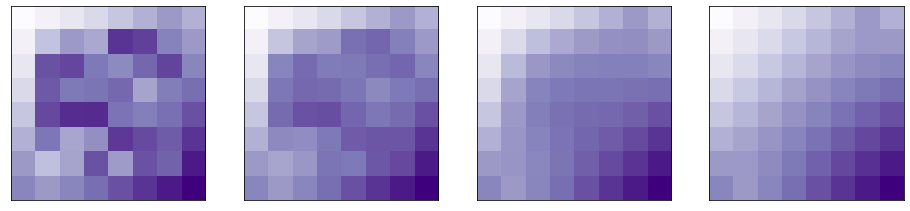

In [4]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#METODE BEDA HINGGA EKSPLISIT DIMENSI DUA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))

ax1 = plt.subplot(141)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.imshow(V[1], cmap='Purples')

ax2 = plt.subplot(142)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.imshow(V[5], cmap='Purples')

ax3 = plt.subplot(143)
ax3.set_xticks([]), ax3.set_yticks([])
ax3.imshow(V[20], cmap='Purples')

ax4 = plt.subplot(144)
ax4.set_xticks([]), ax4.set_yticks([])
ax4.imshow(V[99], cmap='Purples')

In [5]:
#mengambil package yang diperlukan untuk membuat animasi
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Animasi


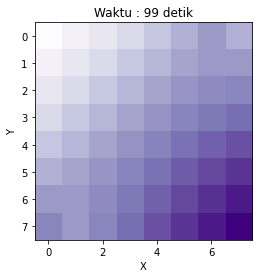

In [10]:
#mengatur posisi kanvas untuk membuat gambar per frame
fig = plt.figure(figsize=(8,4))
ax = plt.subplot()
print('Animasi')
ax.set_xlabel('X')
ax.set_ylabel('Y')

#mengatur posisi awal matriks yang akan digambar pada kanvas
nx = n
ny = m

line2d, = ax.plot([], [], lw=2)

#mendefinisikan animasi (dalam m+1 frame)
def init():
    line2d.set_data([], [])
    ax.imshow(np.zeros((nx, ny)))
    return (line2d,)

def animate(i):
    ax.set_title('Waktu : '+str(i)+' detik')    
    ax.imshow(V[i], cmap='Purples')
    return (line2d,)

#membuat keluaran berupa animasi
anim = animation.FuncAnimation(fig, animate, frames=tn, interval=100, blit=True)
HTML(anim.to_html5_video())